In [4]:
import numpy as np
from numpy.random import randn, seed
import matplotlib.pyplot as plt
from numpy.linalg import inv
from pydataset import data

plt.rcParams["figure.figsize"] = (10, 7)

## A simple Linear Regression

We plot a simple linear regression with a single parameter and a bias. The linear model is given by $\hat y_i = ax_i + b$ and the cost function by
$$
\begin{align}
        J(a, b) &= \frac{1}{2}\sum_i^n(\hat y - y)^2 \\
                &= \frac{1}{2}\sum_i^n(ax + b - y)^2
\end{align}
$$

In [6]:
seed(314159)
a, b = 1.3, 0.6
x = np.linspace(0, 1, 100)
y = a + x * b + randn(100) * 0.07

y.shape = (100, 1)
X = np.c_[np.ones(100), x].T

normeq = inv(X @ X.T) @ X @ y

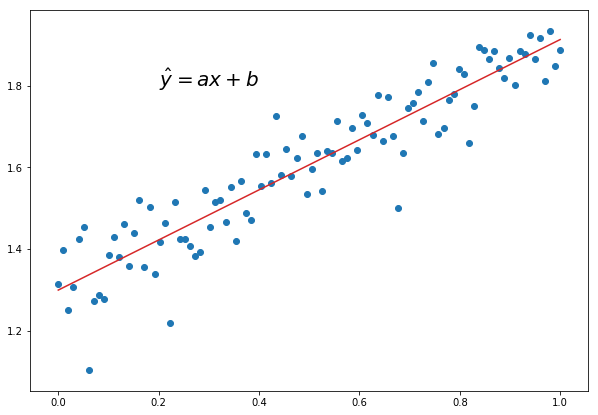

In [7]:
xran = np.linspace(0, 1, 700)
ahat, bhat = normeq.ravel()
plt.scatter(x, y.ravel())
plt.plot(xran, ahat + bhat * xran, color="tab:red")
plt.text(0.2, 1.8, "$\hat y = ax + b$", size=20)
plt.savefig("lreg.pdf")

## The Generalized Linear Regression

To understand the idea behind the generalized linear regression, we consider the `mtcars` dataset with variables:

* `mpg`: Miles/(US) gallon
* `cyl`: Number of cylinders
* `disp`: Displacement (cu.in.)
* `hp`: Gross horsepower
* `drat`: Rear axle ratio
* `wt`: Weight (lb/1000)
* `qsec`: 1/4 mile time
* `vs`: V/S (0 = V-engine, 1 = straight engine)
* `am`: Transmission (0 = automatic, 1 = manual)
* `gear`: Number of forward gears
* `carbs`: Number of carburetors

In [9]:
mtcars = data("mtcars")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2




Suppose we wish to find a linear relationship between `mpg` and all other variables in the `mtcars` dataset. To model this relationship we consider 10 parameters and a *bias* (or correction) term.

$$
    \hat y = \theta_1x^{cyl}_i + \theta_2x^{disp}_i + \ldots + \theta_{10}x^{carbs}_i + b
$$

The resulting cost function is of the form.

$$
    J(\theta_1, \theta_2, \ldots, \theta_{10}, b) = \frac{1}{2}\sum_i^n(\theta_1x^{cyl}_i + \theta_2x^{disp}_i + \ldots + \theta_{10}x^{carbs}_i + b - y_i)^2
$$

To simplify the notation, we might consider grouping all $\{\theta_i\}_{i=1}^{10}$ in a single column vector $\theta \in \mathbb{R^{10}}$,
$$
    \theta = \begin{bmatrix}
                \theta_1 \\
                \theta_2 \\
                \vdots \\
                \theta_{10}
             \end{bmatrix}
$$

For the $j$-th observation, i.e., a specific car, we group all of its parameters in another column vector $X_{j} \in \mathbb{R}^{10}$
$$
    X_{j} = \begin{bmatrix}
                x^{cyl}_i \\
                x^{disp}_i \\
                \vdots \\
                x^{carbs}_j 
             \end{bmatrix}
$$

Having $\theta$ and $X_{j}$, the output of the model looks as follows:
$$
    \hat y = \theta^T X_{j} + b
$$

To simplify the model further, we might consider the *bias* term $b$ as another parameter to learn in this model. In this case, $X_j$ would have an extra row (at the top) with value of 1. We rewrite $X_j \in \mathbb{R}^{1 + 10}$ and $\theta \in \mathbb{R}^{1 + 10}$ as follows

$$
    X_{j} = \begin{bmatrix}
                1 \\
                x^{cyl}_j \\
                x^{disp}_j \\
                \vdots \\
                x^{carbs}_j 
             \end{bmatrix},
             \theta = \begin{bmatrix}
                \theta_0 \\
                \theta_1 \\
                \theta_2 \\
                \vdots \\
                \theta_{10}
             \end{bmatrix}
$$

Which yields the final representation of the model for a single observations
$$
\hat y_j = \theta^T X_{j}
$$

Our objective function $J(\cdot)$ is now a function $J:\mathbb{R}^{11} \to \mathbb{R}$. Considering $n$ observations,  i.e., $n$ vectors with 11 entries:

$$
    J(\theta) = \frac{1}{2}\sum_i^n(\theta^TX_i - y)^2
$$

With the help of linear algebra we might simplify the model representation further by stacking over columns every observation. The resulting matrix in this example is $X \in \mathbb{R}^{10\times n}$.

$$
    X = \begin{bmatrix}
                1 & 1 & \ldots & 1 \\
                x^{cyl}_1 & x^{cyl}_2 & \ldots & x^{cyl}_n\\
                x^{disp}_1 & x^{disp}_2 & \ldots & x^{disp}_n\\
                \vdots & \vdots & \ddots & \vdots\\
                x^{carbs}_1 & x^{carbs}_2 & \ldots & x^{carbs}_n
             \end{bmatrix}.
$$

For $n$ training examples, the output $\hat y$ is a row vector with $n$ outputs since  $\theta^T \in \mathbb{R}^{1\times 10}$ and $X \in \mathbb{R}^{10 \times n}$.

$$
    \hat y = \theta^T X \in \mathbb{R}^{1\times n}
$$

Recalling that the $L_2$ *norm* of a vector $a \in \mathbb{R}^n$ is defined as

$$
    ||a||_2 = \sqrt{a^T a} = \sqrt{a_1^2 + a_2^2 + \ldots + a_n^2},
$$

we note that $J(\theta)$ can be rewritten in the following matrix form:

$$
    \begin{align}
    J(\theta) &= ||\hat y - y^T||_2^2 \\
              &=   ||\theta^TX - y^T||_2^2
    \end{align}
$$

As with the simple linear regression, to minimize $J$ is to find $\theta$ that makes $J$ as small as possible. How to find the vector $\hat\theta$ that makes this possible?

Recall that the **gradient** (denoted $\nabla$) of a function $f:\mathbb{R}^n \to \mathbb{R}$ is defined as

$$
    \nabla f = \begin{bmatrix}
                \frac{\partial f}{\partial x_1} \\
                \frac{\partial f}{\partial x_2} \\
                \vdots \\
                \frac{\partial f}{\partial x_n} \\
               \end{bmatrix}
$$

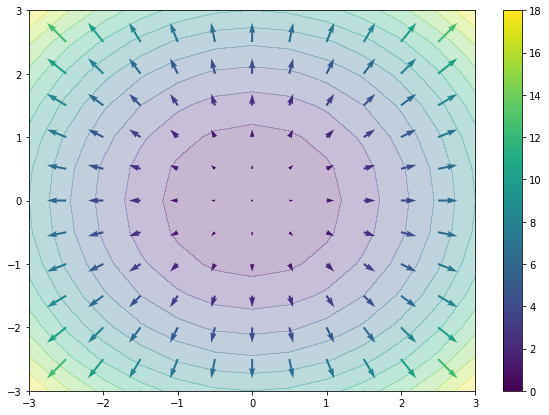

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin


X, Y = np.mgrid[-3:3.01:0.5, -3:3.01:0.5]
dx = 2 * X 
dy = 2 * Y
f = X ** 2 + Y **2

plt.contourf(X, Y, f, 15, alpha=0.3)
plt.quiver(X, Y, dx, dy, f)
plt.colorbar()
plt.savefig("grad.pdf")

For a function $g:\mathbb{R}^2 \to \mathbb{R}$, $\nabla g(x, y)$ is a vector that represents how fast the function grows (or decays) at every $(x, y)$. To find where $\nabla g(x, y) = \textbf{0}$ is to find the coordinates where the function is neither increasing nor decreasing, hence a minimum or maximum (knowing $g$ is convex).

The $L_2$ norm, as a function of $\theta$ is an $11$-dimensional bowl like surface. Finding where $\nabla J(\theta^*) = \textbf{0}$ guarantees to find the set of parameters that minimizes $J$

Before computing the gradient of $J(\theta)$ let us rewrite this equation into something more tractable to work with

$$
\begin{align}
   J(\theta) &= \frac{1}{2}||\theta^TX - y^T||_2^2\\
             &= \frac{1}{2}(\theta^TX - y^T)(\theta^TX - y^T)^T \\
             &= \frac{1}{2}(\theta^TX - y^T)(X^T\theta - y)\\
             &= \frac{1}{2}(\theta^TXX^T - \theta^T Xy - y^TX^T\theta + y^Ty)\\
             &= \frac{1}{2}(\theta^TXX^T - 2\theta^T Xy + y^Ty)
\end{align}
$$

We now turn to compute the gradient of $J$
$$
    \begin{align}
        \nabla_\theta J(\theta) &= \nabla_\theta \frac{1}{2}(\theta^TXX^T - 2\theta^T Xy + y^Ty) \\
        &= \nabla_\theta \frac{1}{2}(\theta^TXX^T - 2\theta^T Xy) + \nabla_\theta y^Ty \\
        &= \frac{1}{2} (2 XX^T\theta -  2 Xy)\\
        &= XX^T\theta - Xy
    \end{align}
$$

Setting $\nabla_\theta J(\theta) := 0$ and solving for theta we find that
$$
    \theta^* = (XX^T)^{-1}Xy
$$

Where we denote $\theta^*$ the optimal value for this problem.

In [5]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
mtcars.shape

(32, 11)

Let us solve the `mtcars` problem using the formula above.

In [128]:
X = np.r_[np.ones((1, len(mtcars))), mtcars.values[:, 1:].T]
y = mtcars.values[:, 0].T.reshape(-1, 1)

theta_opt = inv(X @ X.T) @ X @ y

In [130]:
# Printing the estimated coefficients
for thetai, label in zip(theta_opt, ["bias", *mtcars.columns[1:]]):
    print(f"{label:>4}: {thetai[0]:.3f}")

bias: 12.303
 cyl: -0.111
disp: 0.013
  hp: -0.021
drat: 0.787
  wt: -3.715
qsec: 0.821
  vs: 0.318
  am: 2.520
gear: 0.655
carb: -0.199


In [133]:
# L2 norm squared: The residual sum of squares error
RSS = (theta_opt.T @ X - y.T) @ (theta_opt.T @ X - y.T).T
RSS

array([[ 147.49443002]])